In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astropy.table import Table
import data_management
import ratios_z
import ratios_ha
import ratios_o32
import line_coverage

SPHINX_DATA = Path('/Users/njc5787/Research/SPHINX-20-data/data').resolve()
RUBIES_DATA = Path('../data').resolve()
FIGURES = Path('./figures').resolve()

LINE_SIGNAL_TO_NOISE = 3

RUBY_HEXCODE = '#E0115F'
GRATING_COLORS = [RUBY_HEXCODE, 'k']
COLORS = ['#CC79A7', '#D55E00', '#0072B2', '#56B4E9', '#009E73', '#E69F00', '#000000', '#F0E442',]
PRISM_COLOR = COLORS[2]
G395M_COLOR = COLORS[1]

OII_COLOR = COLORS[0]
NEIII_COLOR = COLORS[1]
HB_COLOR = COLORS[2]
OIII_4959_COLOR = COLORS[3]
OIII_5007_COLOR = COLORS[4]
HA_COLOR = COLORS[5]
SII_COLOR = COLORS[5]


In [2]:
line_fluxes = pd.read_csv(RUBIES_DATA.joinpath('line_flux_df.csv'), index_col=0)
line_fluxes_prism = data_management.make_df_prism(line_fluxes)
line_fluxes_g395m = data_management.make_df_g395m(line_fluxes)

O32df_prism = data_management.signal_to_noise_O32_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
O32df_g395m = data_management.signal_to_noise_O32_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
O32df_both = pd.merge(O32df_prism, O32df_g395m, on='id', how='inner')

O32Hadf_prism = data_management.signal_to_noise_O32Ha_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
O32Hadf_g395m = data_management.signal_to_noise_O32Ha_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
O32Hadf_both = pd.merge(O32Hadf_prism, O32Hadf_g395m, on='id', how='inner')

R23df_prism = data_management.signal_to_noise_R23_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
R23df_g395m = data_management.signal_to_noise_R23_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
R23df_both = pd.merge(R23df_prism, R23df_g395m, on='id', how='inner')

R23Hadf_prism = data_management.signal_to_noise_R23Ha_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
R23Hadf_g395m = data_management.signal_to_noise_R23Ha_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
R23Hadf_both = pd.merge(R23Hadf_prism, R23Hadf_g395m, on='id', how='inner')

O3Hbdf_prism = data_management.signal_to_noise_O3Hb_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
O3Hbdf_g395m = data_management.signal_to_noise_O3Hb_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
O3Hbdf_both = pd.merge(O3Hbdf_prism, O3Hbdf_g395m, on='id', how='inner')

O3HbHadf_prism = data_management.signal_to_noise_O3HbHa_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
O3HbHadf_g395m = data_management.signal_to_noise_O3HbHa_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
O3HbHadf_both = pd.merge(O3HbHadf_prism, O3HbHadf_g395m, on='id', how='inner')

Ne3O2df_prism = data_management.signal_to_noise_Ne3O2_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
Ne3O2df_g395m = data_management.signal_to_noise_Ne3O2_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
Ne3O2df_both = pd.merge(Ne3O2df_prism, Ne3O2df_g395m, on='id', how='inner')

Ne3O2Hadf_prism = data_management.signal_to_noise_Ne3O2Ha_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
Ne3O2Hadf_g395m = data_management.signal_to_noise_Ne3O2Ha_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
Ne3O2Hadf_both = pd.merge(Ne3O2Hadf_prism, Ne3O2Hadf_g395m, on='id', how='inner')

Ne3O32df_prism = data_management.signal_to_noise_Ne3O32_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
Ne3O32df_g395m = data_management.signal_to_noise_Ne3O32_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
Ne3O32df_both = pd.merge(Ne3O32df_prism, Ne3O32df_g395m, on='id', how='inner')

Hadf_prism = line_fluxes_prism[data_management.signal_to_noise_Ha_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)]
Hadf_g395m = line_fluxes_g395m[data_management.signal_to_noise_Ha_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)]
Hadf_both = pd.merge(Hadf_prism, Hadf_g395m, on='id', how='inner')

Hbdf_prism = line_fluxes_prism[data_management.signal_to_noise_Hb_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)]
Hbdf_g395m = line_fluxes_g395m[data_management.signal_to_noise_Hb_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)]
Hbdf_both = pd.merge(Hbdf_prism, Hbdf_g395m, on='id', how='inner')


O3df_prism = line_fluxes_prism[data_management.signal_to_noise_5007_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)]
O3df_g395m = line_fluxes_g395m[data_management.signal_to_noise_5007_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)]
O3df_both = pd.merge(O3df_prism, O3df_g395m, on='id', how='inner')

sphinxdf = data_management.make_sphinx_df(SPHINX_DATA)
sphinx_binned = data_management.make_sphinx_binned_df(sphinxdf)



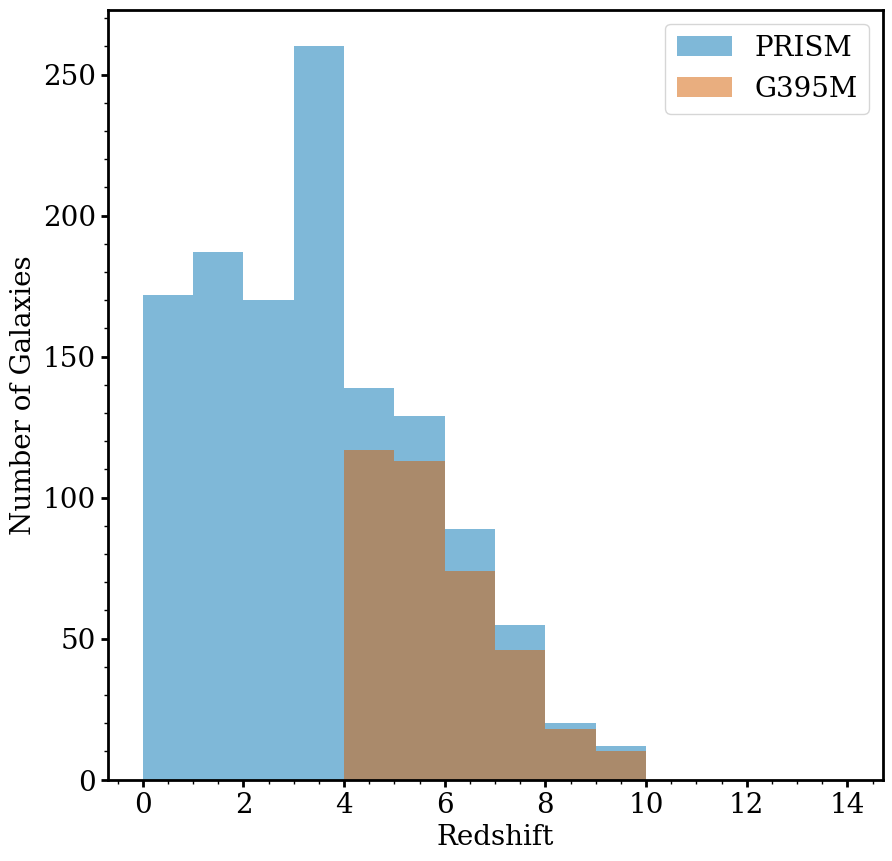

In [4]:
bins = np.arange(0,15,1)
plt.figure(figsize=(10,10))
plt.hist(line_fluxes_prism.z_prism, color=PRISM_COLOR, alpha=0.5, bins=bins, label='PRISM')
plt.hist(line_fluxes_g395m.z_g395m, color=G395M_COLOR, alpha=0.5, bins=bins, label='G395M')
plt.xlabel('Redshift')
plt.ylabel('Number of Galaxies')
plt.legend()
plt.savefig(FIGURES.joinpath('zhist.pdf'))
plt.show()

In [67]:
egs_photometry = list(RUBIES_DATA.glob('egs*sps*.fits'))
egs_photometrydf = (Table.read(egs_photometry[0], format='fits')
      .to_pandas()
)
uds_photometry = list(RUBIES_DATA.glob('uds*sps*.fits'))
uds_photometrydf = (Table.read(uds_photometry[0], format='fits')
      .to_pandas()
)

In [68]:
egs_photometrydf

,id,ra,dec,z_spec,z_16,z_50,z_84,mtot_16,mtot_50,mtot_84,...,UV_84,VJ_16,VJ_50,VJ_84,gi_16,gi_50,gi_84,ug_16,ug_50,ug_84
0,314,215.047219,52.873545,1.0792,1.066959,1.081151,1.093502,7.663324,7.959884,8.144108,...,0.571482,-0.322055,-0.197852,-0.061830,-0.114493,-0.033172,0.057216,0.368097,0.488109,0.643127
1,482,215.055700,52.881958,2.4795,2.466267,2.479461,2.492917,10.342180,10.546886,10.728413,...,1.516407,1.639147,1.717575,1.788404,1.209361,1.261519,1.315392,1.401962,1.486741,1.564780
2,761,215.048281,52.879975,3.4749,3.460055,3.473852,3.488612,8.999971,9.286930,9.565404,...,0.614665,0.157427,0.333753,0.524187,0.138138,0.183933,0.219282,0.445031,0.518839,0.602441
3,920,215.052344,52.884268,3.6213,3.606445,3.618377,3.634835,8.759178,9.008563,9.229348,...,0.335386,-0.328727,-0.104180,0.017901,-0.145954,-0.105428,-0.075021,0.285114,0.329636,0.365150
4,921,215.049804,52.882520,4.6191,4.606992,4.620721,4.633611,7.999528,8.249279,8.503069,...,0.507230,-0.245120,-0.027888,0.162618,-0.101650,-0.017435,0.053855,0.278632,0.370020,0.483905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,975193,214.967248,52.963630,6.9899,6.990930,7.001648,7.007428,8.124916,8.336600,8.582315,...,0.364252,-1.342373,-1.122922,-0.803765,-0.529217,-0.459257,-0.379925,-0.132223,-0.073191,-0.000226
632,978590,214.830660,52.887775,7.7616,7.747797,7.760693,7.774701,8.987303,9.334288,9.755920,...,1.200153,0.329156,0.861999,1.471908,0.431347,0.710257,1.050598,0.772538,0.956267,1.150985
633,980841,214.844770,52.892109,8.6937,8.680703,8.695250,8.707724,9.328617,9.623724,9.887245,...,0.739568,-0.194869,0.190751,0.642494,0.063064,0.219559,0.373995,0.349845,0.428431,0.510854
634,986615,214.950932,52.957040,6.5036,6.488228,6.499406,6.515163,8.763231,9.048732,9.360532,...,0.539225,-0.309389,-0.111038,0.118091,-0.107790,-0.006101,0.099194,0.397051,0.454037,0.514091


In [104]:
uds_photometrydf.columns

Index(['id_v70', 'id', 'ra', 'dec', 'z_spec', 'z_16', 'z_50', 'z_84',
       'mtot_16', 'mtot_50', 'mtot_84', 'mstar_16', 'mstar_50', 'mstar_84',
       'met_16', 'met_50', 'met_84', 'mwa_16', 'mwa_50', 'mwa_84', 'dust2_16',
       'dust2_50', 'dust2_84', 'dust_index_16', 'dust_index_50',
       'dust_index_84', 'dust1_fraction_16', 'dust1_fraction_50',
       'dust1_fraction_84', 'logfagn_16', 'logfagn_50', 'logfagn_84',
       'sfr10_16', 'sfr10_50', 'sfr10_84', 'sfr30_16', 'sfr30_50', 'sfr30_84',
       'sfr100_16', 'sfr100_50', 'sfr100_84', 'ssfr10_16', 'ssfr10_50',
       'ssfr10_84', 'ssfr30_16', 'ssfr30_50', 'ssfr30_84', 'ssfr100_16',
       'ssfr100_50', 'ssfr100_84', 'rest_U_16', 'rest_U_50', 'rest_U_84',
       'rest_V_16', 'rest_V_50', 'rest_V_84', 'rest_J_16', 'rest_J_50',
       'rest_J_84', 'rest_u_16', 'rest_u_50', 'rest_u_84', 'rest_g_16',
       'rest_g_50', 'rest_g_84', 'rest_i_16', 'rest_i_50', 'rest_i_84',
       'UV_16', 'UV_50', 'UV_84', 'VJ_16', 'VJ_50', 'VJ_84',

In [103]:
photometrydf = pd.concat([egs_photometrydf, uds_photometrydf])

In [3]:
line_fluxes

,id,z_prism,z_g395m,msaexp_OIII5007_prism,msaexp_e_OIII5007_prism,msaexp_OIII5007_g395m,msaexp_e_OIII5007_g395m,msaexp_OIII_5007_prism,msaexp_e_OIII_5007_prism,msaexp_OIII_5007_g395m,...,Oii_3727_prism_p84_err,Oii_3727_g395m,Oii_3727_g395m_p16_err,Oii_3727_g395m_p84_err,Neiii_3869_prism,Neiii_3869_prism_p16_err,Neiii_3869_prism_p84_err,Neiii_3869_g395m,Neiii_3869_g395m_p16_err,Neiii_3869_g395m_p84_err
0,280,2.324955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.705917,NaN,NaN,NaN,7.205222,15.491648,4.978259,NaN,NaN,NaN
1,314,1.078537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.222069,NaN,NaN,NaN,0.624974,12.695762,17.451188,NaN,NaN,NaN
2,482,2.499984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,159.154577,NaN,NaN,NaN,255.616745,156.530563,188.807999,NaN,NaN,NaN
3,532,1.387871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,361.492870,NaN,NaN,NaN,299.190857,165.586510,273.808491,NaN,NaN,NaN
4,761,3.473451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,113.409875,NaN,NaN,NaN,91.831337,53.702393,71.507103,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,975718,7.876692,7.873466,NaN,NaN,NaN,NaN,602.85880,26.466034,376.06590,...,28.638984,104.703682,28.675217,30.779262,64.747452,20.026043,22.765048,45.728676,20.976202,22.667755
1273,976141,7.348676,7.346433,NaN,NaN,NaN,NaN,159.37079,24.258465,128.31060,...,27.065228,9.626444,7.317862,13.212904,17.598598,12.952798,16.549258,57.012547,34.678122,48.349345
1274,977908,0.302261,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,35.96833,...,2.881836,NaN,NaN,NaN,29999.252930,8.530273,11.959961,NaN,NaN,NaN
1275,978590,7.762086,7.743028,NaN,NaN,NaN,NaN,169.48310,22.472012,135.44159,...,8.963379,90.531357,52.445415,62.532183,3.408596,10.508815,9.203482,93.606052,60.902589,90.601711


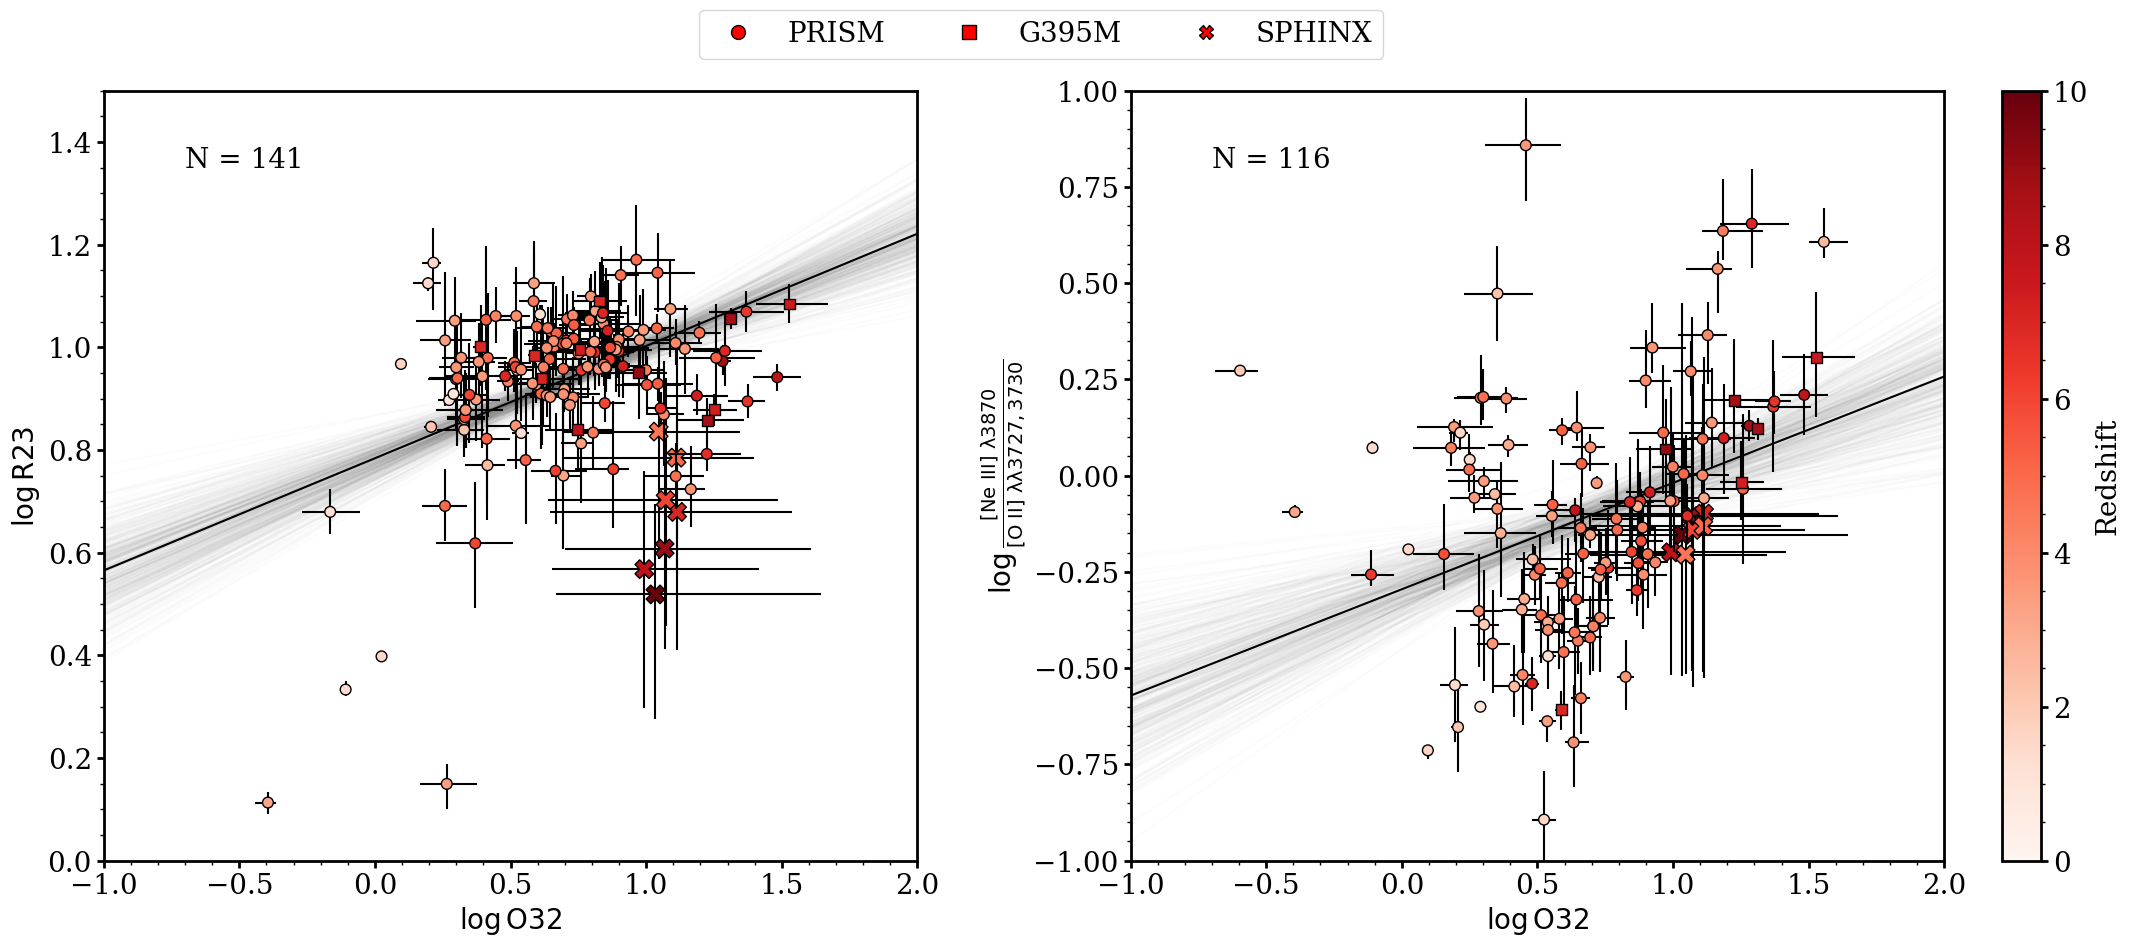

In [42]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
from nikkos_tools import stat_functions as sf
import data_management
import globals
import linmix
line_fluxes = pd.read_csv(globals.RUBIES_DATA.joinpath('line_flux_df.csv'), index_col=0)
line_fluxes_prism = data_management.make_df_prism(line_fluxes)
line_fluxes_g395m = data_management.make_df_g395m(line_fluxes)


R23df_prism = data_management.signal_to_noise_R23_prism(line_fluxes_prism, globals.LINE_SIGNAL_TO_NOISE)
R23df_g395m = data_management.signal_to_noise_R23_g395m(line_fluxes_g395m, globals.LINE_SIGNAL_TO_NOISE)
R23df_both = pd.merge(R23df_prism, R23df_g395m, on='id', how='inner')

Ne3O32df_prism = data_management.signal_to_noise_Ne3O32_prism(line_fluxes_prism, globals.LINE_SIGNAL_TO_NOISE)
Ne3O32df_g395m = data_management.signal_to_noise_Ne3O32_g395m(line_fluxes_g395m, globals.LINE_SIGNAL_TO_NOISE)
Ne3O32df_both = pd.merge(Ne3O32df_prism, Ne3O32df_g395m, on='id', how='inner')

sphinxdf = data_management.make_sphinx_df(globals.SPHINX_DATA)
sphinx_binned = data_management.make_sphinx_binned_df(sphinxdf)

def plot_R23_versus_O32(ax):
    chain = fit_R23_versus_O32_linmix()
    plot_linmix(ax, chain, -1, 2)
    # ax.scatter(sphinxdf.log_O32, sphinxdf.log_R23, marker='h', c='k', alpha=0.1, label='SPHINX')
    ax.errorbar(x=sphinx_binned.log_O32_sphinx, y=sphinx_binned.log_R23_sphinx, 
                xerr=[sphinx_binned.log_O32_sphinx_16, sphinx_binned.log_O32_sphinx_84], 
                yerr=[sphinx_binned.log_R23_sphinx_16, sphinx_binned.log_R23_sphinx_84], 
                ls='None', c='k', zorder=-9, label='SPHINX')
    ax.scatter(x=sphinx_binned.log_O32_sphinx, y=sphinx_binned.log_R23_sphinx, 
                s=180, marker='X', ec='k', c=sphinx_binned.redshift, cmap='Reds', vmin=0, vmax=10, zorder=-9, label='SPHINX')
    ax.errorbar(x=np.log10(R23df_prism.O32), y=np.log10(R23df_prism.R23), 
                xerr=[sf.propagate_uncertainty_log10(R23df_prism.O32,R23df_prism.O32_ERR_16), sf.propagate_uncertainty_log10(R23df_prism.O32,R23df_prism.O32_ERR_84)], 
                yerr=[sf.propagate_uncertainty_log10(R23df_prism.R23,R23df_prism.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_prism.R23,R23df_prism.R23_ERR_84)], 
                ls='None', c='k', zorder=-1)
    ax.scatter(x=np.log10(R23df_prism.O32), y=np.log10(R23df_prism.R23), 
                marker='o', ec='k', c=R23df_prism.z_prism, cmap='Reds', vmin=0, vmax=10, s=60, label='PRISM')
    ax.errorbar(x=np.log10(R23df_g395m.O32), y=np.log10(R23df_g395m.R23), 
                xerr=[sf.propagate_uncertainty_log10(R23df_g395m.O32,R23df_g395m.O32_ERR_16), sf.propagate_uncertainty_log10(R23df_g395m.O32,R23df_g395m.O32_ERR_84)], 
                yerr=[sf.propagate_uncertainty_log10(R23df_g395m.R23,R23df_g395m.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_g395m.R23,R23df_g395m.R23_ERR_84)], 
                ls='None', c='k', zorder=-1)
    ax.scatter(x=np.log10(R23df_g395m.O32), y=np.log10(R23df_g395m.R23), 
                marker='s', ec='k', c=R23df_g395m.z_g395m, cmap='Reds', vmin=0, vmax=10, s=60, label='G395M')
    ax.annotate(f'N = {len(R23df_prism)+len(R23df_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'$\log\rm{O32}$')
    ax.set_ylabel(r'$\log\rm{R23}$')
    ax.axis([-1, 2, 0, 1.5])

def plot_NeIIIOII_versus_O32(ax):
    chain = fit_NeIIIOII_versus_O32_linmix()
    plot_linmix(ax, chain, -1, 2)
    # ax.scatter(sphinxdf.log_O32, sphinxdf.log_NeIII_OII, marker='h', c='k', alpha=0.1, label='SPHINX')
    ax.errorbar(x=sphinx_binned.log_O32_sphinx, y=sphinx_binned.log_NeIII_OII_sphinx, 
                xerr=[sphinx_binned.log_O32_sphinx_16, sphinx_binned.log_O32_sphinx_84], 
                yerr=[sphinx_binned.log_NeIII_OII_sphinx_16, sphinx_binned.log_NeIII_OII_sphinx_84], 
                ls='None', c='k', zorder=-9, label='SPHINX')
    ax.scatter(x=sphinx_binned.log_O32_sphinx, y=sphinx_binned.log_NeIII_OII_sphinx, 
                s=180, marker='X', ec='k', c=sphinx_binned.redshift, cmap='Reds', vmin=0, vmax=10, zorder=-9, label='SPHINX')
    ax.errorbar(x=np.log10(Ne3O32df_prism.O32), y=np.log10(Ne3O32df_prism.NeIII_OII), 
                xerr=[sf.propagate_uncertainty_log10(Ne3O32df_prism.O32,Ne3O32df_prism.O32_ERR_16), sf.propagate_uncertainty_log10(Ne3O32df_prism.O32,Ne3O32df_prism.O32_ERR_84)], 
                yerr=[sf.propagate_uncertainty_log10(Ne3O32df_prism.NeIII_OII,Ne3O32df_prism.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O32df_prism.NeIII_OII,Ne3O32df_prism.NeIII_OII_ERR_84)], 
                ls='None', c='k', zorder=-1)
    ax.scatter(x=np.log10(Ne3O32df_prism.O32), y=np.log10(Ne3O32df_prism.NeIII_OII), 
                marker='o', ec='k', c=Ne3O32df_prism.z_prism, cmap='Reds', vmin=0, vmax=10, s=60, label='PRISM')
    ax.errorbar(x=np.log10(Ne3O32df_g395m.O32), y=np.log10(Ne3O32df_g395m.NeIII_OII), 
                xerr=[sf.propagate_uncertainty_log10(Ne3O32df_g395m.O32,Ne3O32df_g395m.O32_ERR_16), sf.propagate_uncertainty_log10(Ne3O32df_g395m.O32,Ne3O32df_g395m.O32_ERR_84)], 
                yerr=[sf.propagate_uncertainty_log10(Ne3O32df_g395m.NeIII_OII,Ne3O32df_g395m.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O32df_g395m.NeIII_OII,Ne3O32df_g395m.NeIII_OII_ERR_84)], 
                ls='None', c='k', zorder=-1)
    ax.scatter(x=np.log10(Ne3O32df_g395m.O32), y=np.log10(Ne3O32df_g395m.NeIII_OII), 
                marker='s', ec='k', c=Ne3O32df_g395m.z_g395m, cmap='Reds', vmin=0, vmax=10, s=60, label='G395M')
    ax.annotate(f'N = {len(Ne3O32df_prism)+len(Ne3O32df_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'$\log\rm{O32}$')
    ax.set_ylabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
    ax.axis([-1,2,-1,1])

def generate_legend_elements_ratios_versus_O32():
    legend_elements = [
                   Line2D([0], [0], marker='o', color='none', label='PRISM', markerfacecolor='red', markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='s', color='none', label='G395M', markerfacecolor='red', markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='X', color='none', label='SPHINX', markerfacecolor='red', markeredgecolor='black', markersize=np.sqrt(100)),
                    ] 
    return legend_elements

def make_ratios_versus_O32_plot():
    fig = plt.figure(figsize=(25,10))
    gs = GridSpec(nrows=1, ncols=100)
    gs.update(wspace=0, hspace=0)

    ax0 = fig.add_subplot(gs[0:1, 0:42])
    plot_R23_versus_O32(ax=ax0)
    
    ax1 = fig.add_subplot(gs[0:1, 53:95])
    plot_NeIIIOII_versus_O32(ax=ax1)

    cax = fig.add_subplot(gs[0:1, 98:100])
    norm = mpl.colors.Normalize(vmin=0, vmax=10)
    fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='Reds'), cax=cax, use_gridspec=True, label='Redshift')

    legend_elements = generate_legend_elements_ratios_versus_O32()     
    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.975), facecolor='white', ncol=4, fontsize=20)

    plt.savefig(globals.FIGURES.joinpath('ratios_O32.pdf'))

make_ratios_versus_O32_plot()

In [22]:
import linmix
def fit_R23_versus_O32_linmix():
    x = pd.concat([np.log10(R23df_prism.O32), np.log10(R23df_g395m.O32)])
    y = pd.concat([np.log10(R23df_prism.R23), np.log10(R23df_g395m.R23)])
    xsig = pd.concat([(sf.propagate_uncertainty_log10(R23df_prism.O32,R23df_prism.O32_ERR_16) + sf.propagate_uncertainty_log10(R23df_prism.O32,R23df_prism.O32_ERR_84)) / 2,
                        (sf.propagate_uncertainty_log10(R23df_g395m.O32,R23df_g395m.O32_ERR_16) + sf.propagate_uncertainty_log10(R23df_g395m.O32,R23df_g395m.O32_ERR_84)) / 2])
    ysig = pd.concat([(sf.propagate_uncertainty_log10(R23df_prism.R23,R23df_prism.R23_ERR_16) + sf.propagate_uncertainty_log10(R23df_prism.R23,R23df_prism.R23_ERR_84)) / 2,
                        (sf.propagate_uncertainty_log10(R23df_g395m.R23,R23df_g395m.R23_ERR_16) + sf.propagate_uncertainty_log10(R23df_g395m.R23,R23df_g395m.R23_ERR_84)) / 2])

    lm = linmix.LinMix(x, y, xsig, ysig, K=2)
    lm.run_mcmc(silent=True)

    return lm.chain

In [23]:
fit_R23_versus_O32_linmix()

array([(0.80336096, 0.18951181, 0.01897456, [0.61355728, 0.38644272], [0.75587583, 0.76120216], [0.17148837, 0.07194514], 0.65401045, 0.01250432, 0.02658797, 0.75793415, 0.36472913, 0.4484921 ),
       (0.75035043, 0.24104637, 0.01621727, [0.60876427, 0.39123573], [0.66427737, 0.70983948], [0.12127512, 0.07808344], 0.59937655, 0.01941708, 0.0359806 , 0.6821029 , 0.32383855, 0.52260441),
       (0.77300679, 0.2005019 , 0.01882181, [0.62928124, 0.37071876], [0.64474948, 0.71222928], [0.11945188, 0.10198421], 0.6404043 , 0.01118343, 0.02732852, 0.66976551, 0.33769596, 0.44256613),
       ...,
       (0.77339213, 0.23454785, 0.01863382, [0.27703931, 0.72296069], [0.72210488, 0.78317876], [0.13689134, 0.12228048], 0.90050368, 0.12736397, 0.25987365, 0.76625889, 0.35647629, 0.52231653),
       (0.7689937 , 0.21933562, 0.0187037 , [0.25571519, 0.74428481], [0.72055832, 0.72547429], [0.04503498, 0.10292465], 0.51592662, 0.03562993, 0.13252072, 0.7242172 , 0.29686021, 0.42986636),
       (0.780

In [27]:
def fit_NeIII_OII_versus_O32_linmix():
    x = pd.concat([np.log10(Ne3O32df_prism.O32), np.log10(Ne3O32df_g395m.O32)])
    y = pd.concat([np.log10(Ne3O32df_prism.NeIII_OII), np.log10(Ne3O32df_g395m.NeIII_OII)])
    xsig = pd.concat([(sf.propagate_uncertainty_log10(Ne3O32df_prism.O32,Ne3O32df_prism.O32_ERR_16) + sf.propagate_uncertainty_log10(Ne3O32df_prism.O32,Ne3O32df_prism.O32_ERR_84)) / 2,
                        (sf.propagate_uncertainty_log10(Ne3O32df_g395m.O32,Ne3O32df_g395m.O32_ERR_16) + sf.propagate_uncertainty_log10(Ne3O32df_g395m.O32,Ne3O32df_g395m.O32_ERR_84)) / 2])
    ysig = pd.concat([(sf.propagate_uncertainty_log10(Ne3O32df_prism.NeIII_OII,Ne3O32df_prism.NeIII_OII_ERR_16) + sf.propagate_uncertainty_log10(Ne3O32df_prism.NeIII_OII,Ne3O32df_prism.NeIII_OII_ERR_84)) / 2,
                        (sf.propagate_uncertainty_log10(Ne3O32df_g395m.NeIII_OII,Ne3O32df_g395m.NeIII_OII_ERR_16) + sf.propagate_uncertainty_log10(Ne3O32df_g395m.NeIII_OII,Ne3O32df_g395m.NeIII_OII_ERR_84)) / 2])

    lm = linmix.LinMix(x, y, xsig, ysig, K=2)
    lm.run_mcmc(silent=True)

    return lm.chain

In [29]:
fit_NeIII_OII_versus_O32_linmix()

array([(-0.29171521, 0.23647312, 0.07655637, [0.8081799 , 0.1918201 ], [0.72191441, 0.55189584], [0.12883538, 0.36004246], 0.29868907, 0.19882115, 0.7761646 , 0.68930143, 0.42150534, 0.3389209 ),
       (-0.30137681, 0.35686995, 0.11056416, [0.80644542, 0.19355458], [0.79520837, 0.39803698], [0.11813158, 0.33051498], 0.645855  , 0.12951784, 0.25434781, 0.71833403, 0.4287913 , 0.41805727),
       (-0.31552336, 0.21727765, 0.1082818 , [0.85792891, 0.14207109], [0.72971676, 0.46409111], [0.12141396, 0.17475044], 0.8404235 , 0.08089565, 0.07475205, 0.69197903, 0.37093329, 0.23789351),
       ...,
       (-0.22361785, 0.14939034, 0.07466465, [0.98158719, 0.01841281], [0.66480816, 0.86496014], [0.13247601, 0.29574637], 1.13636024, 0.04930949, 0.01721442, 0.66849352, 0.36906141, 0.19778723),
       (-0.29550581, 0.1717433 , 0.07629431, [0.91225822, 0.08774178], [0.69954682, 0.95718293], [0.13301113, 0.43330629], 0.85900592, 0.05610733, 0.21924134, 0.72215227, 0.40579864, 0.24464832),
       (

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


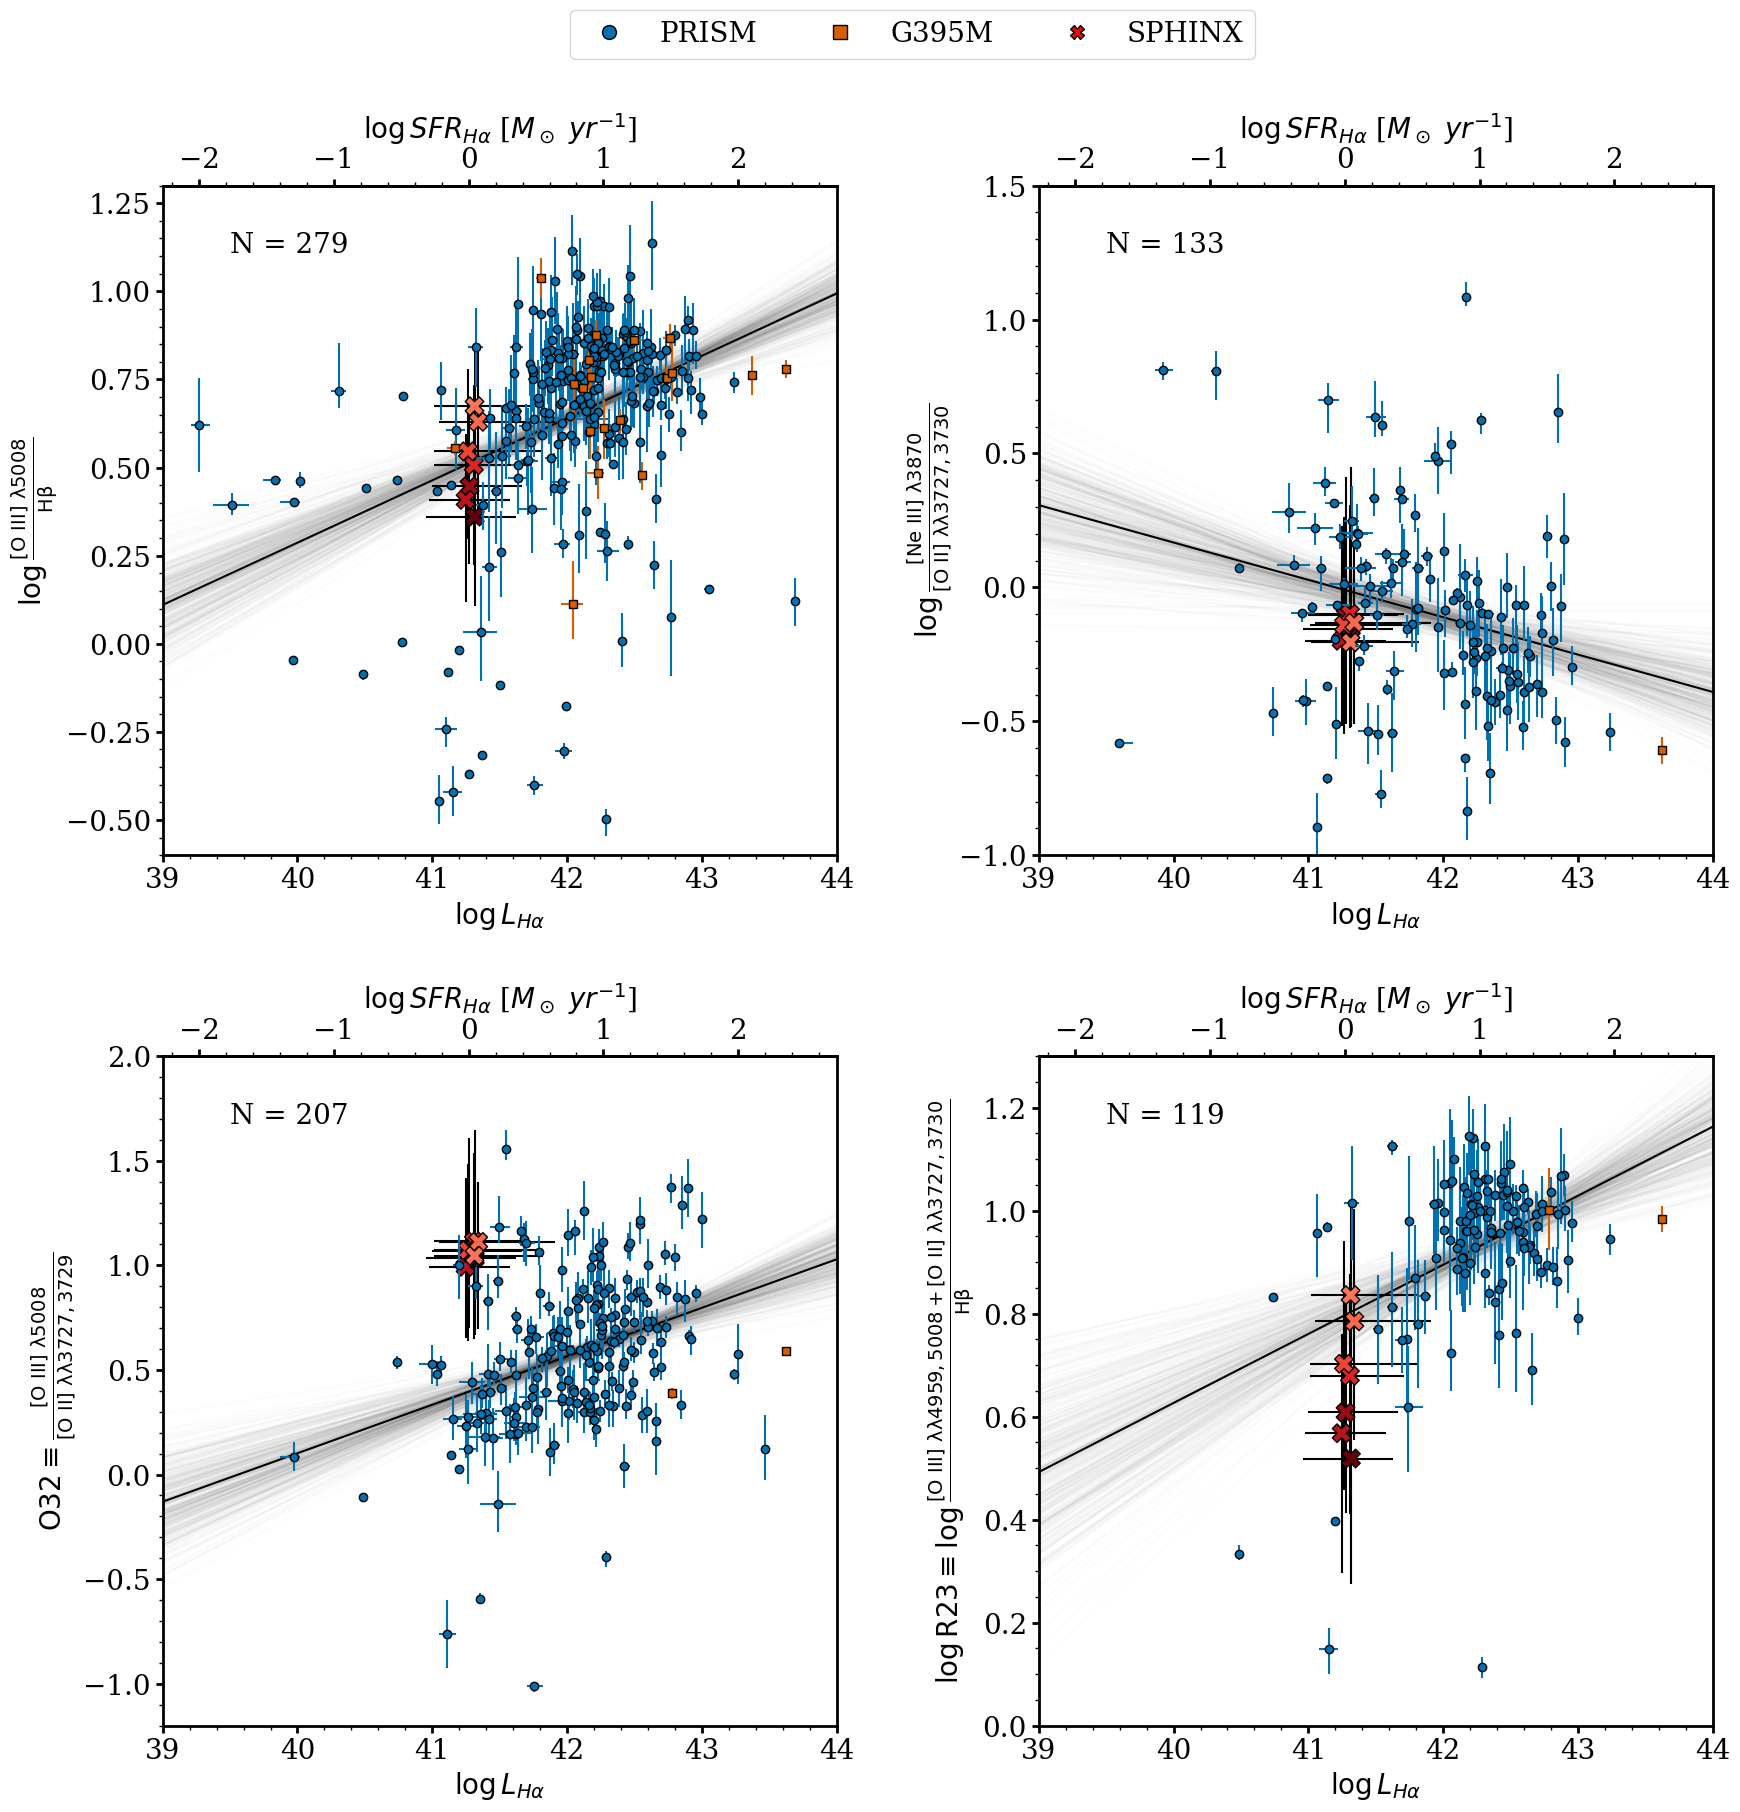

In [7]:
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
from astropy.table import Table
from nikkos_tools import stat_functions as sf
import data_management
import linmix_fits
import globals

line_fluxes = pd.read_csv(globals.RUBIES_DATA.joinpath('line_flux_df.csv'), index_col=0)
line_fluxes_prism = data_management.make_df_prism(line_fluxes)
line_fluxes_g395m = data_management.make_df_g395m(line_fluxes)

O32Hadf_prism = data_management.signal_to_noise_O32Ha_prism(line_fluxes_prism, globals.LINE_SIGNAL_TO_NOISE)
O32Hadf_g395m = data_management.signal_to_noise_O32Ha_g395m(line_fluxes_g395m, globals.LINE_SIGNAL_TO_NOISE)
O32Hadf_both = pd.merge(O32Hadf_prism, O32Hadf_g395m, on='id', how='inner')

R23Hadf_prism = data_management.signal_to_noise_R23Ha_prism(line_fluxes_prism, globals.LINE_SIGNAL_TO_NOISE)
R23Hadf_g395m = data_management.signal_to_noise_R23Ha_g395m(line_fluxes_g395m, globals.LINE_SIGNAL_TO_NOISE)
R23Hadf_both = pd.merge(R23Hadf_prism, R23Hadf_g395m, on='id', how='inner')

O3HbHadf_prism = data_management.signal_to_noise_O3HbHa_prism(line_fluxes_prism, globals.LINE_SIGNAL_TO_NOISE)
O3HbHadf_g395m = data_management.signal_to_noise_O3HbHa_g395m(line_fluxes_g395m, globals.LINE_SIGNAL_TO_NOISE)
O3HbHadf_both = pd.merge(O3HbHadf_prism, O3HbHadf_g395m, on='id', how='inner')

Ne3O2Hadf_prism = data_management.signal_to_noise_Ne3O2Ha_prism(line_fluxes_prism, globals.LINE_SIGNAL_TO_NOISE)
Ne3O2Hadf_g395m = data_management.signal_to_noise_Ne3O2Ha_g395m(line_fluxes_g395m, globals.LINE_SIGNAL_TO_NOISE)
Ne3O2Hadf_both = pd.merge(Ne3O2Hadf_prism, Ne3O2Hadf_g395m, on='id', how='inner')

sphinxdf = data_management.make_sphinx_df(globals.SPHINX_DATA)
sphinx_binned = data_management.make_sphinx_binned_df(sphinxdf)

def plot_OIIIHb_versus_Ha(ax):
    chain = linmix_fits.fit_OIIIHb_versus_Ha_linmix()
    linmix_fits.plot_linmix(ax, chain, 39, 44)
    ax.errorbar(x=sphinx_binned.log_LHa_sphinx, y=sphinx_binned.log_OIII_Hb_sphinx, 
                xerr=[sphinx_binned.log_LHa_sphinx_16, sphinx_binned.log_LHa_sphinx_84], 
                yerr=[sphinx_binned.log_OIII_Hb_sphinx_16, sphinx_binned.log_OIII_Hb_sphinx_84], 
                ls='None', c='k', zorder=-9, label='SPHINX')
    ax.scatter(x=sphinx_binned.log_LHa_sphinx, y=sphinx_binned.log_OIII_Hb_sphinx, 
                s=180, marker='X', ec='k', c=sphinx_binned.redshift, cmap='Reds', vmin=0, vmax=10, zorder=-9, label='SPHINX')
    # ax.scatter(np.log10(sphinxdf["H__1_6562.80A_int"]), sphinxdf.log_OIII_Hb, marker='h', c='k', alpha=0.1, label='SPHINX')
    ax.errorbar(x=np.log10(O3HbHadf_prism.L_Ha), y=np.log10(O3HbHadf_prism.OIII_Hb), 
            xerr=[sf.propagate_uncertainty_log10(O3HbHadf_prism.L_Ha,O3HbHadf_prism.L_Ha_ERR_16), sf.propagate_uncertainty_log10(O3HbHadf_prism.L_Ha,O3HbHadf_prism.L_Ha_ERR_84)],
            yerr=[sf.propagate_uncertainty_log10(O3HbHadf_prism.OIII_Hb,O3HbHadf_prism.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3HbHadf_prism.OIII_Hb,O3HbHadf_prism.OIII_Hb_ERR_84)],
            ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')
    ax.errorbar(x=np.log10(O3HbHadf_g395m.L_Ha), y=np.log10(O3HbHadf_g395m.OIII_Hb), 
                xerr=[sf.propagate_uncertainty_log10(O3HbHadf_g395m.L_Ha,O3HbHadf_g395m.L_Ha_ERR_16), sf.propagate_uncertainty_log10(O3HbHadf_g395m.L_Ha,O3HbHadf_g395m.L_Ha_ERR_84)],
                yerr=[sf.propagate_uncertainty_log10(O3HbHadf_g395m.OIII_Hb,O3HbHadf_g395m.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3HbHadf_g395m.OIII_Hb,O3HbHadf_g395m.OIII_Hb_ERR_84)],
                ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')

    ax.annotate(f'N = {len(O3HbHadf_prism)+len(O3HbHadf_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'$\log L_{H\alpha}$')
    ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
    secax = ax.secondary_xaxis('top', functions=(lambda x: x-41.27, lambda x: x+41.27))
    secax.set_xlabel(r'$\log SFR_{H\alpha}$ [$M_\odot~yr^{-1}$]', labelpad=6.0)
    ax.axis([39, 44, -0.6, 1.3])

def plot_NeIIIOII_versus_Ha(ax):
    chain = linmix_fits.fit_NeIIIOII_versus_Ha_linmix()
    linmix_fits.plot_linmix(ax, chain, 39, 44)
    ax.errorbar(x=sphinx_binned.log_LHa_sphinx, y=sphinx_binned.log_NeIII_OII_sphinx, 
                xerr=[sphinx_binned.log_LHa_sphinx_16, sphinx_binned.log_LHa_sphinx_84], 
                yerr=[sphinx_binned.log_NeIII_OII_sphinx_16, sphinx_binned.log_NeIII_OII_sphinx_84], 
                ls='None', c='k', zorder=-9, label='SPHINX')
    ax.scatter(x=sphinx_binned.log_LHa_sphinx, y=sphinx_binned.log_NeIII_OII_sphinx, 
                s=180, marker='X', ec='k', c=sphinx_binned.redshift, cmap='Reds', vmin=0, vmax=10, zorder=-9, label='SPHINX')
    # ax.scatter(np.log10(sphinxdf["H__1_6562.80A_int"]), sphinxdf.log_NeIII_OII, marker='h', c='k', alpha=0.1, label='SPHINX')
    ax.errorbar(x=np.log10(Ne3O2Hadf_prism.L_Ha), y=np.log10(Ne3O2Hadf_prism.NeIII_OII), 
                xerr=[sf.propagate_uncertainty_log10(Ne3O2Hadf_prism.L_Ha,Ne3O2Hadf_prism.L_Ha_ERR_16), sf.propagate_uncertainty_log10(Ne3O2Hadf_prism.L_Ha,Ne3O2Hadf_prism.L_Ha_ERR_84)],
                yerr=[sf.propagate_uncertainty_log10(Ne3O2Hadf_prism.NeIII_OII,Ne3O2Hadf_prism.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2Hadf_prism.NeIII_OII,Ne3O2Hadf_prism.NeIII_OII_ERR_84)],
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')
    ax.errorbar(x=np.log10(Ne3O2Hadf_g395m.L_Ha), y=np.log10(Ne3O2Hadf_g395m.NeIII_OII), 
                xerr=[sf.propagate_uncertainty_log10(Ne3O2Hadf_g395m.L_Ha,Ne3O2Hadf_g395m.L_Ha_ERR_16), sf.propagate_uncertainty_log10(Ne3O2Hadf_g395m.L_Ha,Ne3O2Hadf_g395m.L_Ha_ERR_84)],
                yerr=[sf.propagate_uncertainty_log10(Ne3O2Hadf_g395m.NeIII_OII,Ne3O2Hadf_g395m.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2Hadf_g395m.NeIII_OII,Ne3O2Hadf_g395m.NeIII_OII_ERR_84)],
                ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')
    ax.annotate(f'N = {len(Ne3O2Hadf_prism)+len(Ne3O2Hadf_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'$\log L_{H\alpha}$')
    ax.set_ylabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
    secax = ax.secondary_xaxis('top', functions=(lambda x: x-41.27, lambda x: x+41.27))
    secax.set_xlabel(r'$\log SFR_{H\alpha}$ [$M_\odot~yr^{-1}$]', labelpad=6.0)
    ax.axis([39, 44, -1, 1.5])

def plot_O32_versus_Ha(ax):
    chain = linmix_fits.fit_O32_versus_Ha_linmix()
    linmix_fits.plot_linmix(ax, chain, 39, 44)
    ax.errorbar(x=sphinx_binned.log_LHa_sphinx, y=sphinx_binned.log_O32_sphinx, 
                xerr=[sphinx_binned.log_LHa_sphinx_16, sphinx_binned.log_LHa_sphinx_84], 
                yerr=[sphinx_binned.log_O32_sphinx_16, sphinx_binned.log_O32_sphinx_84], 
                ls='None', c='k', zorder=-9, label='SPHINX')
    ax.scatter(x=sphinx_binned.log_LHa_sphinx, y=sphinx_binned.log_O32_sphinx, 
                s=180, marker='X', ec='k', c=sphinx_binned.redshift, cmap='Reds', vmin=0, vmax=10, zorder=-9, label='SPHINX')
    # ax.scatter(np.log10(sphinxdf["H__1_6562.80A_int"]), sphinxdf.log_O32, marker='h', c='k', alpha=0.1, label='SPHINX')
    ax.errorbar(x=np.log10(O32Hadf_prism.L_Ha), y=np.log10(O32Hadf_prism.O32), 
            xerr=[sf.propagate_uncertainty_log10(O32Hadf_prism.L_Ha,O32Hadf_prism.L_Ha_ERR_16), sf.propagate_uncertainty_log10(O32Hadf_prism.L_Ha,O32Hadf_prism.L_Ha_ERR_84)],
            yerr=[sf.propagate_uncertainty_log10(O32Hadf_prism.O32,O32Hadf_prism.O32_ERR_16), sf.propagate_uncertainty_log10(O32Hadf_prism.O32,O32Hadf_prism.O32_ERR_84)],
            ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')
    ax.errorbar(x=np.log10(O32Hadf_g395m.L_Ha), y=np.log10(O32Hadf_g395m.O32), 
                xerr=[sf.propagate_uncertainty_log10(O32Hadf_g395m.L_Ha,O32Hadf_g395m.L_Ha_ERR_16), sf.propagate_uncertainty_log10(O32Hadf_g395m.L_Ha,O32Hadf_g395m.L_Ha_ERR_84)],
                yerr=[sf.propagate_uncertainty_log10(O32Hadf_g395m.O32,O32Hadf_g395m.O32_ERR_16), sf.propagate_uncertainty_log10(O32Hadf_g395m.O32,O32Hadf_g395m.O32_ERR_84)],
                ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')
    ax.annotate(f'N = {len(O32Hadf_prism)+len(O32Hadf_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'$\log L_{H\alpha}$')
    ax.set_ylabel(r'$\rm{O32} \equiv \frac{\rm{[O~III]}~\lambda5008}{\rm{[O~II]}~\lambda\lambda3727,3729}$')
    secax = ax.secondary_xaxis('top', functions=(lambda x: x-41.27, lambda x: x+41.27))
    secax.set_xlabel(r'$\log SFR_{H\alpha}$ [$M_\odot~yr^{-1}$]', labelpad=6.0)
    ax.axis([39, 44, -1.2, 2])

def plot_R23_versus_Ha(ax):
    chain = linmix_fits.fit_R23_versus_Ha_linmix()
    linmix_fits.plot_linmix(ax, chain, 39, 44)
    ax.errorbar(x=sphinx_binned.log_LHa_sphinx, y=sphinx_binned.log_R23_sphinx, 
                xerr=[sphinx_binned.log_LHa_sphinx_16, sphinx_binned.log_LHa_sphinx_84], 
                yerr=[sphinx_binned.log_R23_sphinx_16, sphinx_binned.log_R23_sphinx_84], 
                ls='None', c='k', zorder=-9, label='SPHINX')
    ax.scatter(x=sphinx_binned.log_LHa_sphinx, y=sphinx_binned.log_R23_sphinx, 
                s=180, marker='X', ec='k', c=sphinx_binned.redshift, cmap='Reds', vmin=0, vmax=10, zorder=-9, label='SPHINX')
    
    # ax.scatter(np.log10(sphinxdf["H__1_6562.80A_int"]), sphinxdf.log_R23, marker='h', c='k', alpha=0.1, label='SPHINX')
    ax.errorbar(x=np.log10(R23Hadf_prism.L_Ha), y=np.log10(R23Hadf_prism.R23), 
            xerr=[sf.propagate_uncertainty_log10(R23Hadf_prism.L_Ha,R23Hadf_prism.L_Ha_ERR_16), sf.propagate_uncertainty_log10(R23Hadf_prism.L_Ha,R23Hadf_prism.L_Ha_ERR_84)],
            yerr=[sf.propagate_uncertainty_log10(R23Hadf_prism.R23,R23Hadf_prism.R23_ERR_16), sf.propagate_uncertainty_log10(R23Hadf_prism.R23,R23Hadf_prism.R23_ERR_84)],
            ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')
    ax.errorbar(x=np.log10(R23Hadf_g395m.L_Ha), y=np.log10(R23Hadf_g395m.R23), 
                xerr=[sf.propagate_uncertainty_log10(R23Hadf_g395m.L_Ha,R23Hadf_g395m.L_Ha_ERR_16), sf.propagate_uncertainty_log10(R23Hadf_g395m.L_Ha,R23Hadf_g395m.L_Ha_ERR_84)],
                yerr=[sf.propagate_uncertainty_log10(R23Hadf_g395m.R23,R23Hadf_g395m.R23_ERR_16), sf.propagate_uncertainty_log10(R23Hadf_g395m.R23,R23Hadf_g395m.R23_ERR_84)],
                ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')
    ax.annotate(f'N = {len(R23Hadf_prism)+len(R23Hadf_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'$\log L_{H\alpha}$')
    ax.set_ylabel(r'$\log\rm{R23} \equiv \log\frac{\rm{[O~III]}~\lambda\lambda 4959,5008 + \rm{[O~II]}~\lambda\lambda3727,3730}{H\beta}$')
    secax = ax.secondary_xaxis('top', functions=(lambda x: x-41.27, lambda x: x+41.27))
    secax.set_xlabel(r'$\log SFR_{H\alpha}$ [$M_\odot~yr^{-1}$]', labelpad=6.0)
    ax.axis([39, 44, 0, 1.3])

def generate_legend_elements_ratios_versus_Ha():
    legend_elements = [
                #    Line2D([1], [1], color='k', alpha=0.3, label='Backhaus+2024', markeredgecolor='black'),
                   Line2D([0], [0], marker='o', color='none', label='PRISM', markerfacecolor=globals.PRISM_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='s', color='none', label='G395M', markerfacecolor=globals.G395M_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='X', color='none', label='SPHINX', markerfacecolor='red', markeredgecolor='black', markersize=np.sqrt(100)),
                    ] 
    return legend_elements

def make_ratios_versus_Ha_plot():
    fig = plt.figure(figsize=(20,20))
    gs = GridSpec(nrows=2, ncols=2)
    gs.update(wspace=0.3, hspace=0.3)

    ax0 = fig.add_subplot(gs[0:1, 0:1])
    plot_OIIIHb_versus_Ha(ax=ax0)

    ax1 = fig.add_subplot(gs[0:1, 1:2])
    plot_NeIIIOII_versus_Ha(ax=ax1)

    ax2 = fig.add_subplot(gs[1:2, 0:1])
    plot_O32_versus_Ha(ax=ax2)

    ax3 = fig.add_subplot(gs[1:2, 1:2])
    plot_R23_versus_Ha(ax=ax3)

    legend_elements = generate_legend_elements_ratios_versus_Ha()     
    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.975), facecolor='white', ncol=4, fontsize=20)

    plt.savefig(globals.FIGURES.joinpath('ratios_ha.pdf'))

if __name__ == "__main__":
   make_ratios_versus_Ha_plot()

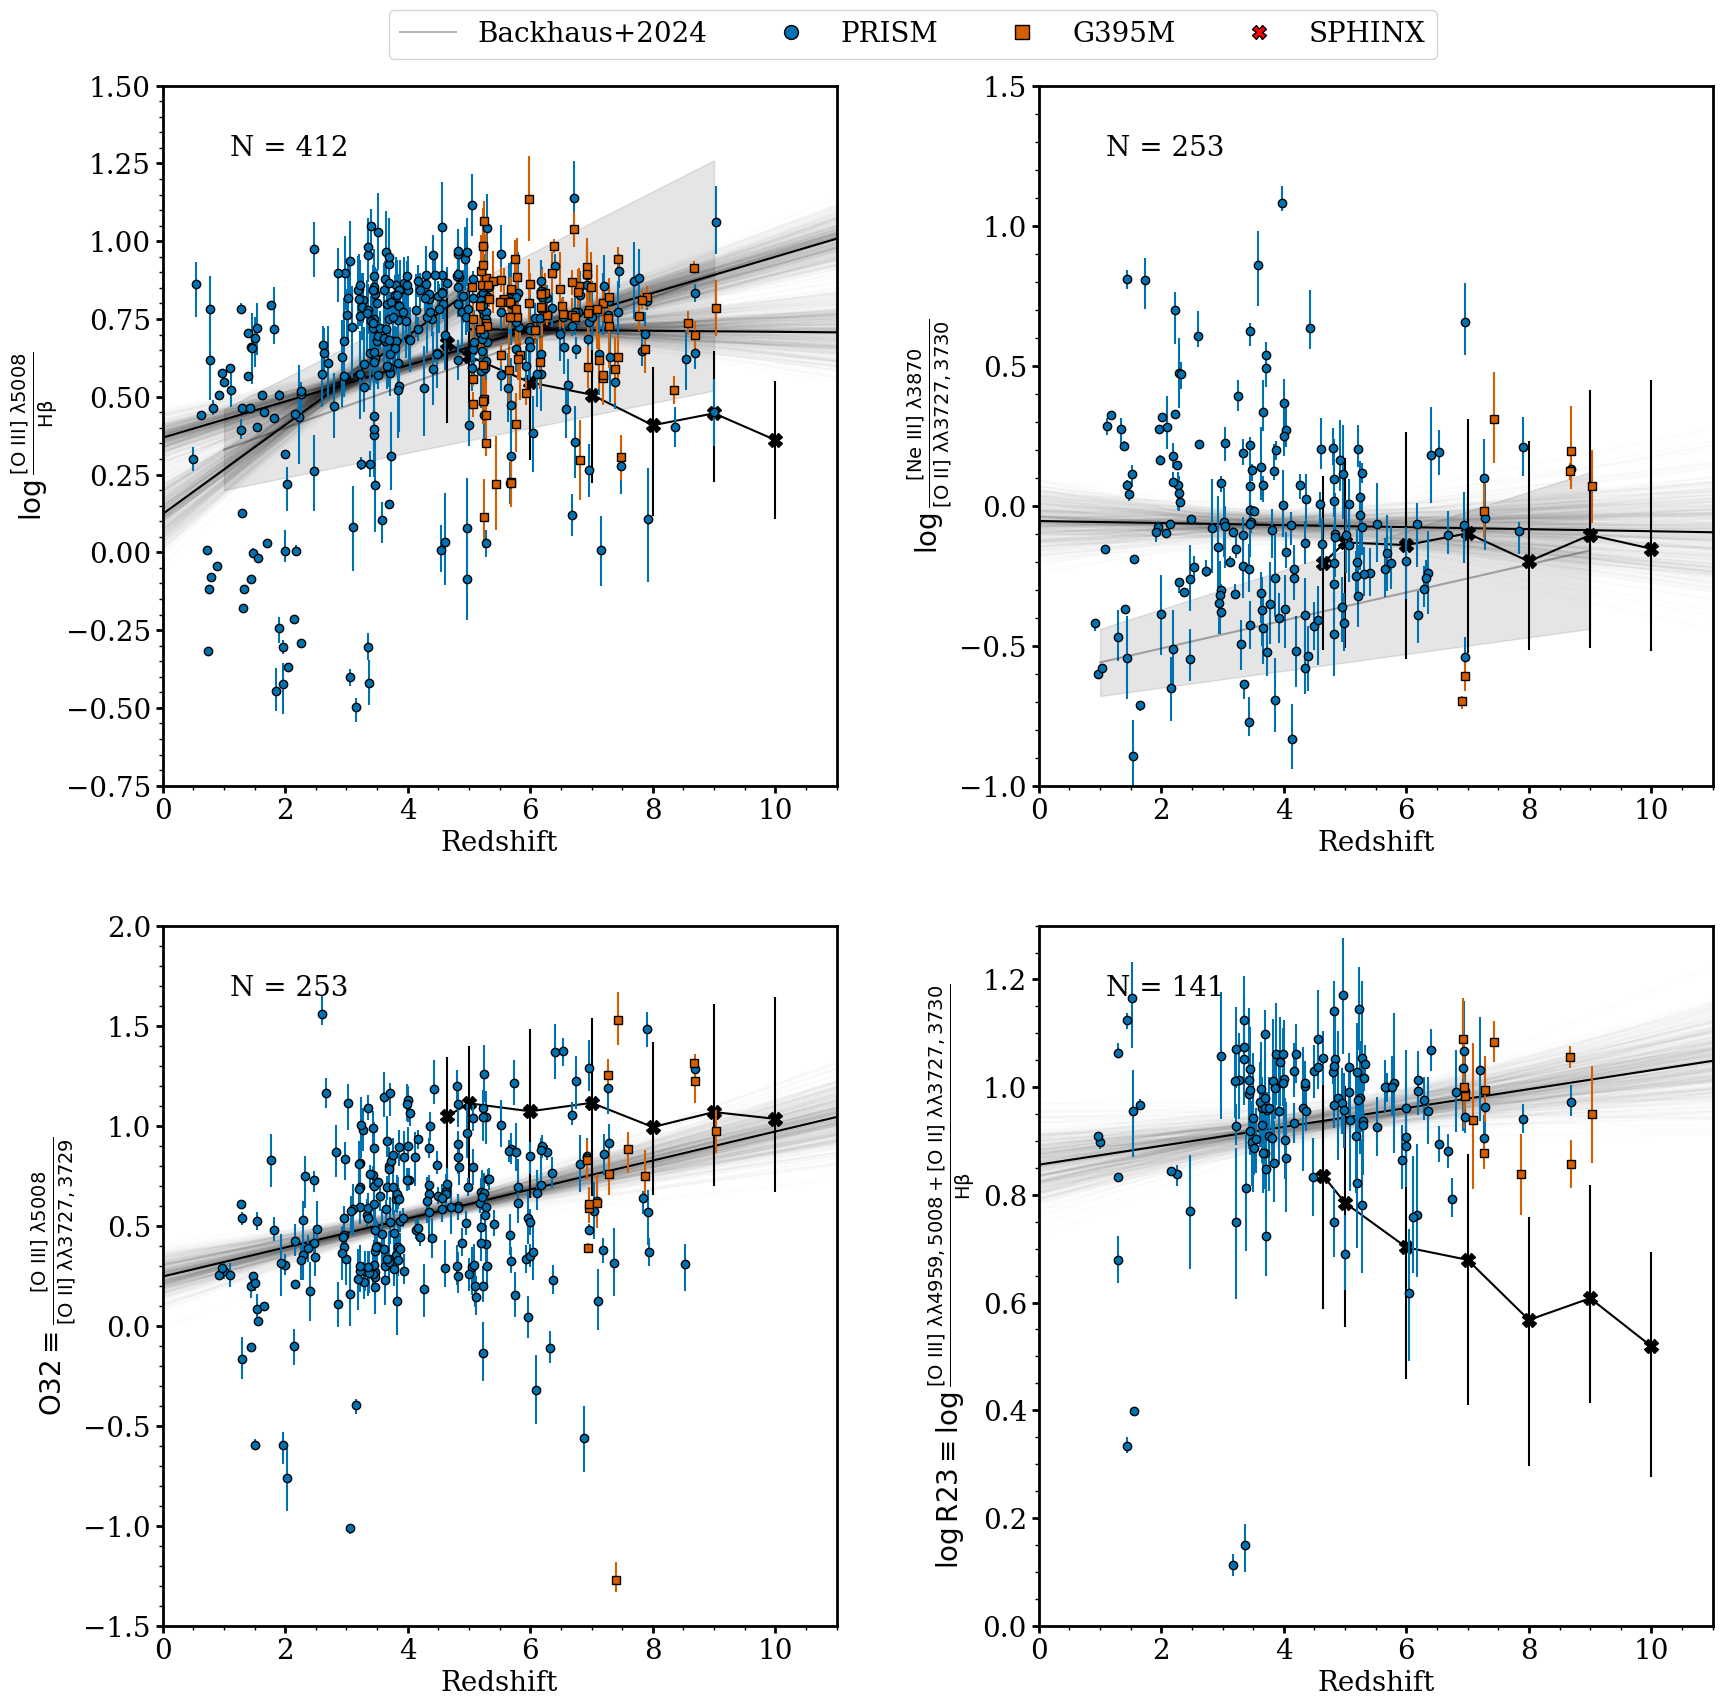

In [9]:
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
from astropy.table import Table
import linmix
import linmix_fits
from nikkos_tools import stat_functions as sf
import data_management
import globals

SPHINX_DATA = Path('/Users/njc5787/Research/SPHINX-20-data/data').resolve()
RUBIES_DATA = Path('../data').resolve()
FIGURES = Path('./figures').resolve()

COLORS = ['#CC79A7', '#D55E00', '#0072B2', '#56B4E9', '#009E73', '#E69F00', '#000000', '#F0E442',]
globals.PRISM_COLOR = COLORS[2]
globals.G395M_COLOR = COLORS[1]

line_fluxes = pd.read_csv(globals.RUBIES_DATA.joinpath('line_flux_df.csv'), index_col=0)
line_fluxes_prism = data_management.make_df_prism(line_fluxes)
line_fluxes_g395m = data_management.make_df_g395m(line_fluxes)

O32df_prism = data_management.signal_to_noise_O32_prism(line_fluxes_prism, globals.LINE_SIGNAL_TO_NOISE)
O32df_g395m = data_management.signal_to_noise_O32_g395m(line_fluxes_g395m, globals.LINE_SIGNAL_TO_NOISE)
O32df_both = pd.merge(O32df_prism, O32df_g395m, on='id', how='inner')

R23df_prism = data_management.signal_to_noise_R23_prism(line_fluxes_prism, globals.LINE_SIGNAL_TO_NOISE)
R23df_g395m = data_management.signal_to_noise_R23_g395m(line_fluxes_g395m, globals.LINE_SIGNAL_TO_NOISE)
R23df_both = pd.merge(R23df_prism, R23df_g395m, on='id', how='inner')

O3Hbdf_prism = data_management.signal_to_noise_O3Hb_prism(line_fluxes_prism, globals.LINE_SIGNAL_TO_NOISE)
O3Hbdf_g395m = data_management.signal_to_noise_O3Hb_g395m(line_fluxes_g395m, globals.LINE_SIGNAL_TO_NOISE)
O3Hbdf_both = pd.merge(O3Hbdf_prism, O3Hbdf_g395m, on='id', how='inner')

Ne3O2df_prism = data_management.signal_to_noise_Ne3O2_prism(line_fluxes_prism, globals.LINE_SIGNAL_TO_NOISE)
Ne3O2df_g395m = data_management.signal_to_noise_Ne3O2_g395m(line_fluxes_g395m, globals.LINE_SIGNAL_TO_NOISE)
Ne3O2df_both = pd.merge(Ne3O2df_prism, Ne3O2df_g395m, on='id', how='inner')


sphinxdf = data_management.make_sphinx_df(globals.SPHINX_DATA)
sphinx_binned = data_management.make_sphinx_binned_df(sphinxdf)

def plot_OIIIHb_versus_redshift(ax):
    chain = linmix_fits.fit_OIIIHb_versus_redshift_linmix()
    chain_z05 = linmix_fits.fit_OIIIHb_versus_redshift_less_than_5_linmix()
    chain_z5plus = linmix_fits.fit_OIIIHb_versus_redshift_greater_than_5_linmix()
    linmix_fits.plot_linmix(ax,chain,0,11)
    linmix_fits.plot_linmix(ax,chain_z05,0,5)
    linmix_fits.plot_linmix(ax,chain_z5plus,5,11)

    ax.errorbar(x=sphinx_binned.redshift, y=sphinx_binned.log_OIII_Hb_sphinx, 
                yerr=[sphinx_binned.log_OIII_Hb_sphinx_16, sphinx_binned.log_OIII_Hb_sphinx_84], 
                ms=10, marker='X', c='k', zorder=-9, label='SPHINX')
    ax.errorbar(x=O3Hbdf_prism.z_prism, y=np.log10(O3Hbdf_prism.OIII_Hb), 
                yerr=[sf.propagate_uncertainty_log10(O3Hbdf_prism.OIII_Hb,O3Hbdf_prism.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3Hbdf_prism.OIII_Hb,O3Hbdf_prism.OIII_Hb_ERR_84)], 
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')
    ax.errorbar(x=O3Hbdf_g395m.z_g395m, y=np.log10(O3Hbdf_g395m.OIII_Hb), 
                yerr=[sf.propagate_uncertainty_log10(O3Hbdf_g395m.OIII_Hb,O3Hbdf_g395m.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3Hbdf_g395m.OIII_Hb,O3Hbdf_g395m.OIII_Hb_ERR_84)], 
                ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')
    z = np.linspace(1,9,1000)
    ax.fill_between(z, 0.04*z + 0.16, 0.10*z + 0.36, color='k', alpha=0.1)
    ax.plot(z, 0.07*z + 0.26, color='k', alpha=0.3, label='Backhaus+2024')
    ax.annotate(f'N = {len(O3Hbdf_prism)+len(O3Hbdf_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel('Redshift')
    ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
    ax.axis([0, 11, -0.75, 1.5])

def plot_NeIIIOII_versus_redshift(ax):
    chain = linmix_fits.fit_NeIIIOII_versus_redshift_linmix()
    linmix_fits.plot_linmix(ax,chain,0,11)

    ax.errorbar(x=sphinx_binned.redshift, y=sphinx_binned.log_NeIII_OII_sphinx, 
                yerr=[sphinx_binned.log_NeIII_OII_sphinx_16, sphinx_binned.log_NeIII_OII_sphinx_84], 
                ms=10, marker='X', c='k', zorder=-9, label='SPHINX')
    ax.errorbar(x=Ne3O2df_prism.z_prism, y=np.log10(Ne3O2df_prism.NeIII_OII), 
             yerr=[sf.propagate_uncertainty_log10(Ne3O2df_prism.NeIII_OII, Ne3O2df_prism.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2df_prism.NeIII_OII, Ne3O2df_prism.NeIII_OII_ERR_84)], 
             ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')
    ax.errorbar(x=Ne3O2df_g395m.z_g395m, y=np.log10(Ne3O2df_g395m.NeIII_OII), 
                yerr=[sf.propagate_uncertainty_log10(Ne3O2df_g395m.NeIII_OII, Ne3O2df_g395m.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2df_g395m.NeIII_OII, Ne3O2df_g395m.NeIII_OII_ERR_84)], 
                ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')
    z = np.linspace(1,9,1000)
    ax.fill_between(z, 0.03*z - 0.71, 0.07*z - 0.51, color='k', alpha=0.1)
    ax.plot(z, 0.05*z - 0.61, color='k', alpha=0.3, label='Backhaus+2024')
    ax.annotate(f'N = {len(O32df_prism)+len(O32df_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel('Redshift')
    ax.set_ylabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
    ax.axis([0, 11, -1, 1.5])

def plot_O32_versus_redshift(ax):
    chain = linmix_fits.fit_O32_versus_redshift_linmix()
    linmix_fits.plot_linmix(ax,chain,0,11)


    ax.errorbar(x=sphinx_binned.redshift, y=sphinx_binned.log_O32_sphinx, 
                yerr=[sphinx_binned.log_O32_sphinx_16, sphinx_binned.log_O32_sphinx_84], 
                ms=10, marker='X', c='k', zorder=-9, label='SPHINX')
    ax.errorbar(x=O32df_prism.z_prism, y=np.log10(O32df_prism.O32), 
                yerr=[sf.propagate_uncertainty_log10(O32df_prism.O32,O32df_prism.O32_ERR_16), sf.propagate_uncertainty_log10(O32df_prism.O32,O32df_prism.O32_ERR_84)], 
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')
    ax.errorbar(x=O32df_g395m.z_g395m, y=np.log10(O32df_g395m.O32), 
                yerr=[sf.propagate_uncertainty_log10(O32df_g395m.O32,O32df_g395m.O32_ERR_16), sf.propagate_uncertainty_log10(O32df_g395m.O32,O32df_g395m.O32_ERR_84)],
                ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')
    ax.annotate(f'N = {len(O32df_prism)+len(O32df_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel('Redshift')
    ax.set_ylabel(r'$\rm{O32} \equiv \frac{\rm{[O~III]}~\lambda5008}{\rm{[O~II]}~\lambda\lambda3727,3729}$')
    ax.axis([0, 11, -1.5, 2])

def plot_R23_versus_redshift(ax):
    chain = linmix_fits.fit_R23_versus_redshift_linmix()
    linmix_fits.plot_linmix(ax,chain,0,11)

    ax.errorbar(x=sphinx_binned.redshift, y=sphinx_binned.log_R23_sphinx, 
                yerr=[sphinx_binned.log_R23_sphinx_16, sphinx_binned.log_R23_sphinx_84], 
                ms=10, marker='X', c='k', zorder=-9, label='SPHINX')
    ax.errorbar(x=R23df_prism.z_prism, y=np.log10(R23df_prism.R23), 
                yerr=[sf.propagate_uncertainty_log10(R23df_prism.R23,R23df_prism.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_prism.R23,R23df_prism.R23_ERR_84)], 
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', zorder=-1, label='PRISM')
    ax.errorbar(x=R23df_g395m.z_g395m, y=np.log10(R23df_g395m.R23), 
                yerr=[sf.propagate_uncertainty_log10(R23df_g395m.R23,R23df_g395m.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_g395m.R23,R23df_g395m.R23_ERR_84)], 
                ls='None', color=globals.G395M_COLOR, marker='s', mec='k', zorder=-1, label='G395M')
    ax.annotate(f'N = {len(R23df_prism)+len(R23df_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel('Redshift')
    ax.set_ylabel(r'$\log\rm{R23} \equiv \log\frac{\rm{[O~III]}~\lambda\lambda 4959,5008 + \rm{[O~II]}~\lambda\lambda3727,3730}{H\beta}$')
    ax.axis([0, 11, 0, 1.3])

def generate_legend_elements_ratios_versus_redshift():
    legend_elements = [
                   Line2D([1], [1], color='k', alpha=0.3, label='Backhaus+2024', markeredgecolor='black'),
                   Line2D([0], [0], marker='o', color='none', label='PRISM', markerfacecolor=globals.PRISM_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='s', color='none', label='G395M', markerfacecolor=globals.G395M_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='X', color='none', label='SPHINX', markerfacecolor='red', markeredgecolor='black', markersize=np.sqrt(100)),
                    ] 
    return legend_elements

def make_ratios_versus_redshift_plot():
    fig = plt.figure(figsize=(20,20))
    gs = GridSpec(nrows=2, ncols=2)
    gs.update(wspace=0.3, hspace=0.2)

    ax0 = fig.add_subplot(gs[0:1, 0:1])
    plot_OIIIHb_versus_redshift(ax=ax0)

    ax1 = fig.add_subplot(gs[0:1, 1:2])
    plot_NeIIIOII_versus_redshift(ax=ax1)

    ax2 = fig.add_subplot(gs[1:2, 0:1])
    plot_O32_versus_redshift(ax=ax2)

    ax3 = fig.add_subplot(gs[1:2, 1:2])
    plot_R23_versus_redshift(ax=ax3)

    legend_elements = generate_legend_elements_ratios_versus_redshift()     
    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.925), facecolor='white', ncol=4, fontsize=20)

    plt.savefig(globals.FIGURES.joinpath('ratios_z.pdf'))


if __name__ == "__main__":
   make_ratios_versus_redshift_plot()